<a href="https://colab.research.google.com/github/setyanoegraha/2025_COLLEGE_AI/blob/main/jobsheet_01/smile_detector/smile_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python
!git clone https://github.com/setyanoegraha/2025_COLLEGE_AI.git

Cloning into '2025_COLLEGE_AI'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 51 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (51/51), 205.01 KiB | 8.91 MiB/s, done.
Resolving deltas: 100% (3/3), done.


Number of detected faces: 1
Smile detected


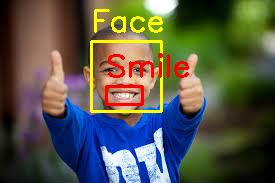

In [3]:
import cv2
from google.colab.patches import cv2_imshow

# Load gambar
img = cv2.imread('/content/2025_COLLEGE_AI/jobsheet_01/smile_detector/smile_face.jpeg')

# Cek apakah gambar berhasil dimuat
if img is None:
    print("Error: Image not loaded! Check the file path.")
    exit()

# Konversi ke grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load haarcascade dengan path yang benar
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

# Cek apakah file berhasil dimuat
if face_cascade.empty() or smile_cascade.empty():
    print("Error: Cascade file not loaded!")
    exit()

# Deteksi wajah
faces = face_cascade.detectMultiScale(gray_img, 1.1, 9)
print('Number of detected faces:', len(faces))

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 255), 2)
    cv2.putText(img, "Face", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

    roi_gray = gray_img[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    # Deteksi senyum dalam ROI wajah
    smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)
    if len(smiles) > 0:
        print("Smile detected")
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (0, 0, 255), 2)
            cv2.putText(img, "Smile", (x+sx, y+sy-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    else:
        print("Smile not detected")

# Tampilkan hasil
cv2_imshow(img)  # Jika di Google Colab
# cv2.imshow('Detected faces', img)  # Jika di PC
cv2.waitKey(0)
cv2.destroyAllWindows()